In [3]:
# convert Dicom to Nifti format - easier handling
import dicom2nifti
from pathlib import Path

In [4]:
path_to_dicom = Path('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/')

In [5]:
dicom2nifti.convert_directory(str(path_to_dicom), str('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/'))

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt

In [7]:
nifti = nib.load('../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/201_t2w_tse.nii.gz')

In [ ]:
print(nifti) # no information about the patients is kept in the nifti file


<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine:
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      

In [9]:
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [10]:
nifti.shape

(256, 256, 27)

In [11]:
image_array = nifti.get_fdata()
print(image_array.shape)

(256, 256, 27)


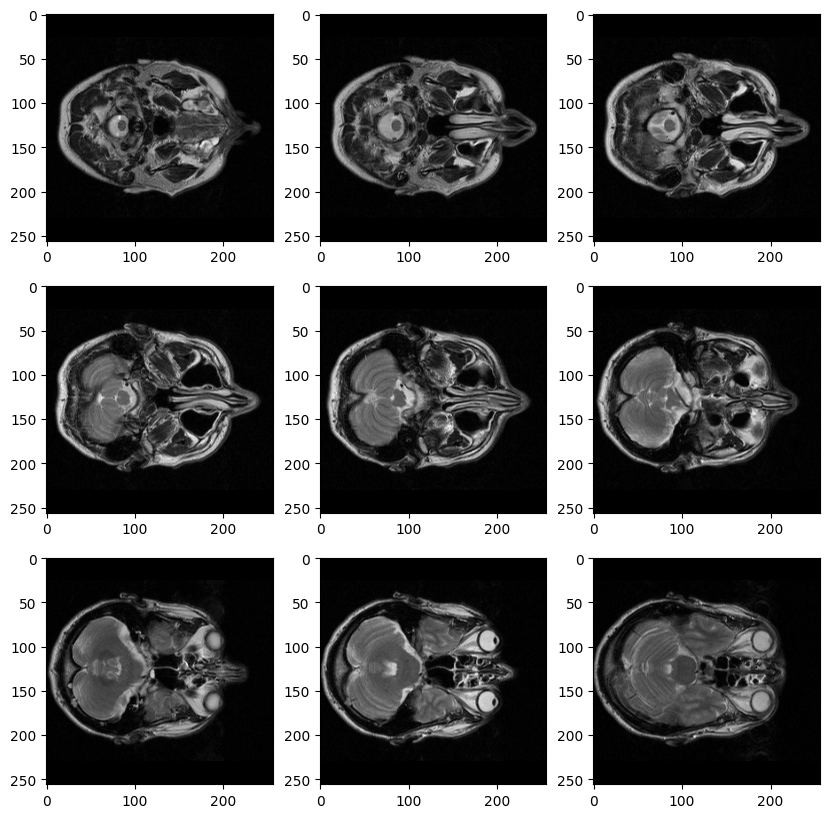

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=[10, 10]) 

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i, j].imshow(image_array[:, :, slice_counter], cmap="gray")
        # axis[i, j].axis("off")
        slice_counter += 1


#! Note Nifti changes the orientation of the image, so the image is flipped

In [14]:
# image processing
image_array_processed = image_array * (image_array > 300) # thresholding


Text(0.5, 1.0, 'Original Image')

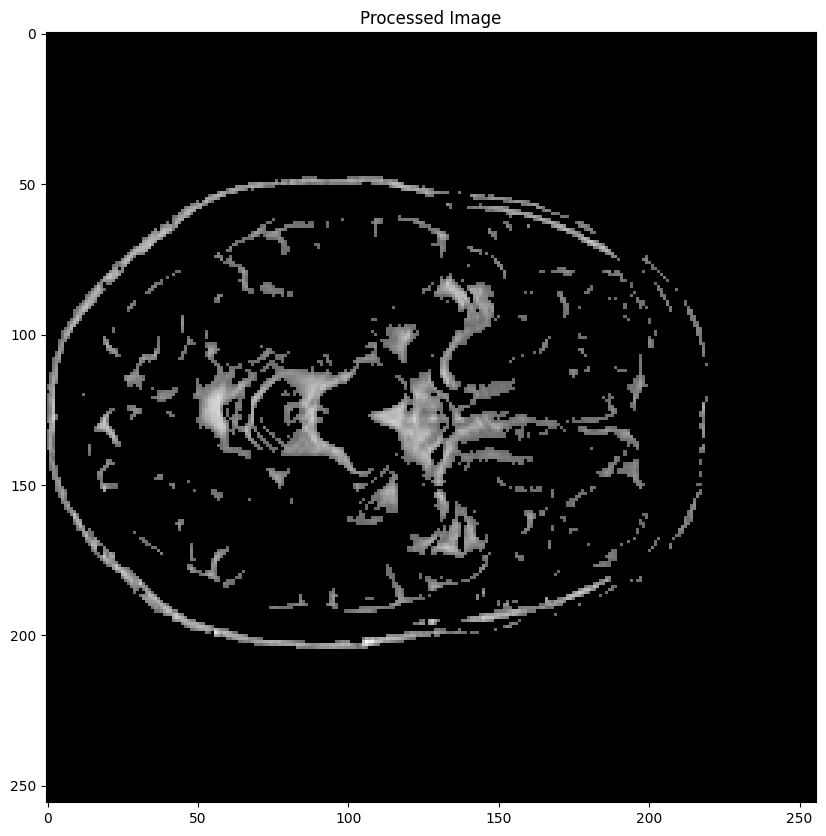

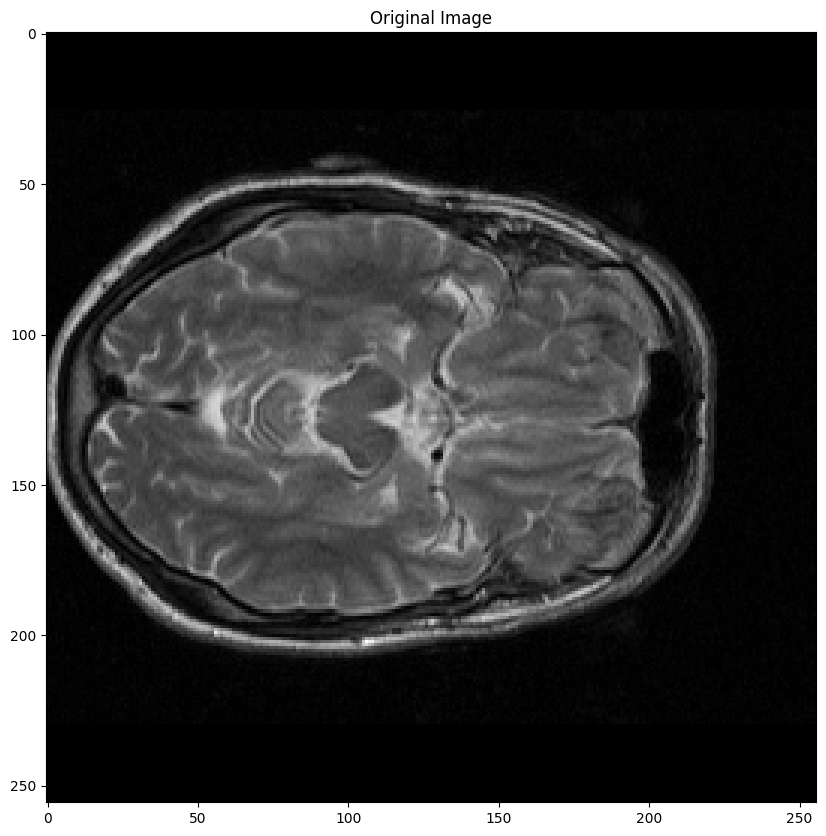

In [16]:
plt.figure(figsize=[10, 10])
plt.imshow(image_array_processed[:, :, 10], cmap="gray")
plt.title("Processed Image")

plt.figure(figsize=[10, 10])
plt.imshow(image_array[:, :, 10], cmap="gray")
plt.title("Original Image")

In [17]:
# Create a nifti image from the processed image
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)

In [19]:
nib.save(processed_nifti, "../setup/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/201_t2w_tse_processed.nii.gz")